In [1]:
import pandas as pd
import scipy as sp
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
pd.set_option('float_format', '{:,.2f}'.format)
pd.set_option('max_columns', None)

In [2]:
# import data
data = pd.read_csv(r'D:\Machine Learning 3\2008.csv')

In [3]:
# function to convert float & int format to timedelta format
def timedelta_convert(float_array):
    string_array = float_array.astype(int).astype(str).str.pad(width = 4, side = 'left', fillchar = '0') # convert to string
    minute_array = string_array.str[-2:] # get the minute part of the string
    hour_array = string_array.str[:2] # get the hour part of the string
    minute_array = pd.to_timedelta(minute_array.astype(int), unit = 'm') # turn the minute part to Timedelta format
    hour_array = pd.to_timedelta(hour_array.astype(int), unit = 'h') # turn the hour part to Timedelta format
    timedelta_array = hour_array + minute_array # join into a timedelta array
    return timedelta_array

In [4]:
data.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,"2,003.00",1955,"2,211.00",2225,WN,335,N712SW,128.00,150.00,116.00,-14.00,8.00,IAD,TPA,810,4.00,8.00,0,NaN,0,nan,nan,nan,nan,nan
1,2008,1,3,4,754.00,735,"1,002.00",1000,WN,3231,N772SW,128.00,145.00,113.00,2.00,19.00,IAD,TPA,810,5.00,10.00,0,NaN,0,nan,nan,nan,nan,nan
2,2008,1,3,4,628.00,620,804.00,750,WN,448,N428WN,96.00,90.00,76.00,14.00,8.00,IND,BWI,515,3.00,17.00,0,NaN,0,nan,nan,nan,nan,nan
3,2008,1,3,4,926.00,930,"1,054.00",1100,WN,1746,N612SW,88.00,90.00,78.00,-6.00,-4.00,IND,BWI,515,3.00,7.00,0,NaN,0,nan,nan,nan,nan,nan
4,2008,1,3,4,"1,829.00",1755,"1,959.00",1925,WN,3920,N464WN,90.00,90.00,77.00,34.00,34.00,IND,BWI,515,3.00,10.00,0,NaN,0,2.00,0.00,0.00,0.00,32.00


DayOfWeek: day of week (1 = Monday, 7 = Sunday)
DepTime: actual departure time (local time: hhmm)
CRSDepTime: CRS departure time (local time: hhmm)
ArrTime: actual arrival time (local time: hhmm)
CRSDepTime: CRS arrival time (local time: hhmm)
UniqueCarrier: unique carrier code
FlightNum: flight number
TailNum: aircraft identification number
ActualElapsedTime: Elapsed Time of Flight, in Minutes
CRSElapsedTime: CRS Elapsed Time of Flight, in Minutes
AirTime: Flight Time, in Minutes
ArrDelay: Difference in minutes between scheduled and actual arrival time. Early arrivals show negative numbers.
DepDelay: Difference in minutes between scheduled and actual departure time. Early departures show negative numbers.
Origin: Origin Airport
Dest: Destination Airport
Distance: Distance between airports (miles)
TaxiIn: Taxi In Time, in Minutes
TaxiOut: Taxi Out Time, in Minutes
Cancelled: Cancelled Flight Indicator (1=Yes)
CancellationCode: Specifies The Reason For Cancellation (A: Carrier, B: Weather, C: National Air System, D: Security)
Diverted: Diverted Flight Indicator (1=Yes)
CarrierDelay: Carrier Delay, in Minutes
WeatherDelay: Weather Delay, in Minutes
NASDelay: National Air System Delay, in Minutes
SecurityDelay: Security Delay, in Minutes
LateAircraftDelay: Late Aircraft Delay, in Minutes

In [5]:
data.isna().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime               136246
CRSDepTime                 0
ArrTime               151649
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
TailNum                83365
ActualElapsedTime     154699
CRSElapsedTime           844
AirTime               154699
ArrDelay              154699
DepDelay              136246
Origin                     0
Dest                       0
Distance                   0
TaxiIn                151649
TaxiOut               137058
Cancelled                  0
CancellationCode     6872294
Diverted                   0
CarrierDelay         5484993
WeatherDelay         5484993
NASDelay             5484993
SecurityDelay        5484993
LateAircraftDelay    5484993
dtype: int64

In [6]:
data = data.dropna(subset = ['DepTime', 'ArrTime', 'ActualElapsedTime', 'AirTime', 'ArrDelay'])
# drop cột Year, Diverted, Cancelled
data = data.drop(columns = ['Year', 'Diverted', 'Cancelled'])
# mã hóa ArrDelay_idx và Depdelay_idx
data['ArrDelay_idx'] = np.where(data.ArrDelay >= 30,1,0)
data['DepDelay_idx'] = np.where(data.DepDelay >= 30,1,0)

In [7]:
data.isna().sum()

Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime                    0
CRSDepTime                 0
ArrTime                    0
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
TailNum                    5
ActualElapsedTime          0
CRSElapsedTime             0
AirTime                    0
ArrDelay                   0
DepDelay                   0
Origin                     0
Dest                       0
Distance                   0
TaxiIn                     0
TaxiOut                    0
CancellationCode     6855029
CarrierDelay         5330294
WeatherDelay         5330294
NASDelay             5330294
SecurityDelay        5330294
LateAircraftDelay    5330294
ArrDelay_idx               0
DepDelay_idx               0
dtype: int64

In [8]:
# convert to timedelta format
data.DepTime = timedelta_convert(data.DepTime)
data.CRSDepTime = timedelta_convert(data.CRSDepTime)

In [9]:
# convert to timedelta format
data.ArrTime = timedelta_convert(data.ArrTime)
data.CRSArrTime = timedelta_convert(data.CRSArrTime)

In [10]:
data.head()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,ArrDelay_idx,DepDelay_idx
0,1,3,4,20:03:00,19:55:00,22:11:00,22:25:00,WN,335,N712SW,128.00,150.00,116.00,-14.00,8.00,IAD,TPA,810,4.00,8.00,NaN,nan,nan,nan,nan,nan,0,0
1,1,3,4,07:54:00,07:35:00,10:02:00,10:00:00,WN,3231,N772SW,128.00,145.00,113.00,2.00,19.00,IAD,TPA,810,5.00,10.00,NaN,nan,nan,nan,nan,nan,0,0
2,1,3,4,06:28:00,06:20:00,08:04:00,07:50:00,WN,448,N428WN,96.00,90.00,76.00,14.00,8.00,IND,BWI,515,3.00,17.00,NaN,nan,nan,nan,nan,nan,0,0
3,1,3,4,09:26:00,09:30:00,10:54:00,11:00:00,WN,1746,N612SW,88.00,90.00,78.00,-6.00,-4.00,IND,BWI,515,3.00,7.00,NaN,nan,nan,nan,nan,nan,0,0
4,1,3,4,18:29:00,17:55:00,19:59:00,19:25:00,WN,3920,N464WN,90.00,90.00,77.00,34.00,34.00,IND,BWI,515,3.00,10.00,NaN,2.00,0.00,0.00,0.00,32.00,1,1


I. Describing data

In [11]:
data.describe()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,ArrDelay_idx,DepDelay_idx
count,"6,855,029.00","6,855,029.00","6,855,029.00",6855029,6855029,6855029,6855029,"6,855,029.00","6,855,029.00","6,855,029.00","6,855,029.00","6,855,029.00","6,855,029.00","6,855,029.00","6,855,029.00","6,855,029.00","1,524,735.00","1,524,735.00","1,524,735.00","1,524,735.00","1,524,735.00","6,855,029.00","6,855,029.00"
mean,6.39,15.74,3.93,0 days 13:32:13.789823,0 days 13:25:41.231265,0 days 15:00:31.976381,0 days 15:07:48.881858,"2,212.51",127.32,129.08,104.02,8.17,9.92,728.74,6.86,16.44,15.77,3.04,17.16,0.07,20.77,0.14,0.12
std,3.40,8.80,1.99,0 days 04:46:41.960021,0 days 04:39:18.021634,0 days 05:03:13.350128,0 days 04:49:47.712612,"1,956.44",70.19,69.53,67.44,38.50,35.20,563.24,4.93,11.31,40.10,19.50,31.89,1.84,39.26,0.34,0.33
min,1.00,1.00,1.00,0 days 00:01:00,0 days 00:00:00,0 days 00:01:00,0 days 00:00:00,1.00,12.00,-141.00,0.00,-519.00,-534.00,11.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,3.00,8.00,2.00,0 days 09:28:00,0 days 09:25:00,0 days 11:07:00,0 days 11:15:00,618.00,77.00,80.00,55.00,-10.00,-4.00,326.00,4.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,6.00,16.00,4.00,0 days 13:25:00,0 days 13:17:00,0 days 15:12:00,0 days 15:15:00,"1,563.00",110.00,111.00,86.00,-2.00,-1.00,581.00,6.00,14.00,0.00,0.00,6.00,0.00,0.00,0.00,0.00
75%,9.00,23.00,6.00,0 days 17:28:00,0 days 17:15:00,0 days 19:09:00,0 days 19:05:00,"3,494.00",157.00,159.00,132.00,12.00,8.00,954.00,8.00,19.00,16.00,0.00,21.00,0.00,26.00,0.00,0.00
max,12.00,31.00,7.00,1 days 00:00:00,0 days 23:59:00,1 days 00:00:00,0 days 23:59:00,"9,741.00","1,379.00",660.00,"1,350.00","2,461.00","2,467.00","4,962.00",308.00,429.00,"2,436.00","1,352.00","1,357.00",392.00,"1,316.00",1.00,1.00


1. 'DepDelay': thời gian delay khi cất cánh
- Count = 6.855.029 quan sát
- Mean = 9,92 mins
- Std = 35,2 mins
- Q1, Q2, Q3 = -4 mins (early), -1 mins (early), 8 mins
- Min, Max = -534 mins, 2.467 mins
=> TB mỗi chuyến bay cất cánh khoảng gần 10 phút và phần lớn các chuyến bay (75%) không cất cánh trễ hơn 8 phút. Số chuyến bay
'Late' là 834.602 ~ 12,18% t.s.q.s.

2. 'ArrDelay': thời gian delay khi hạ cánh
- Count = 6.855.029 quan sát
- Mean =  8,17 mins
- Std =  38,5 mins
- Q1, Q2, Q3 = -10 mins (early), -2 mins (early), 12 mins
- Min, Max = -519 mins (early), 2461 mins (outlier suspected)
=> TB mỗi chuyến bay đến trễ khoảng 8 phút và phần lớn các chuyến bay (75%) không đến trễ hơn 12 phút. Số chuyến bay 'Late' là
927.415 ~ 13,53% t.s.q.s.

3. 'CRSElapsedTime': thời gian bay dự kiến và 'ActualElapsedTime': thời gian bay thực tế
Thời gian bay dự kiến TB của các chuyến bay là 129 phút và thời gian bay thực tế TB là 127 phút

4. 'Distance': khoảng cách bay
Khoảng cách bay TB của các chuyến bay là 728 dặm

5. TaxiOut: chạy đường băng khi cất cánh và TaxiIn: chạy đường bằng khi hạ cánh
Thời gian TaxiOut TB của các chuyến bay là gần 17 phút trong khi TaxiIn TB là gần 7 phút.

6. CarrierDelay (A), WeatherDelay (B), NASDelay (C) và SecurityDelay(D)
Mã nguyên nhân delay khi máy bay đến trễ, tuy nhiên có rất nhiều giá trị N/A nên không thể đưa vào mô hình.

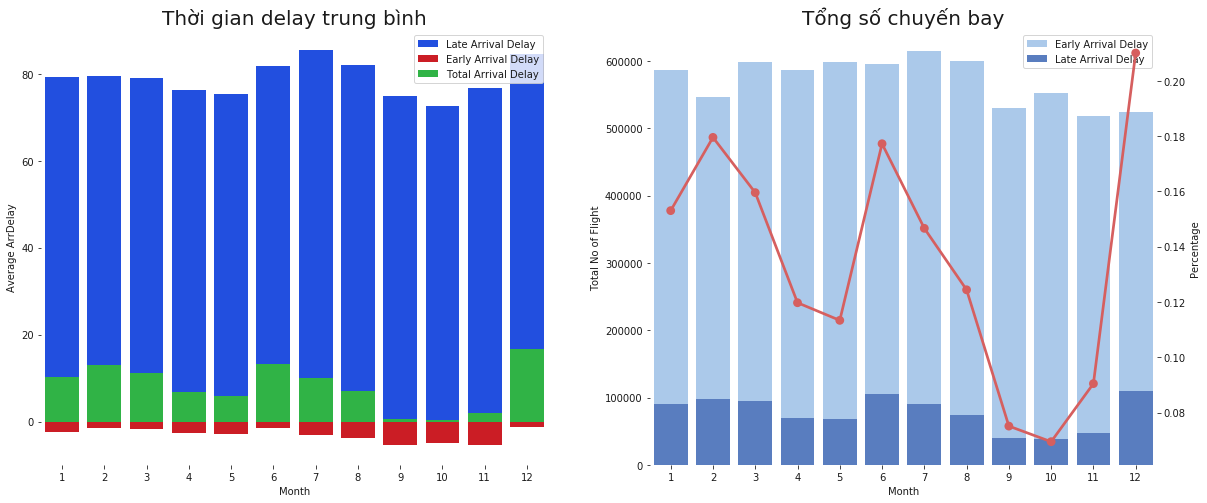

In [12]:
# Đồ thị thứ nhất
# data calculate
early_arrdelay_month = data[data.ArrDelay_idx == 0].groupby('Month').ArrDelay.mean()
early_arrdelay_month = pd.DataFrame({'Month':range(1,13),'ArrDelay':early_arrdelay_month.values})
late_arrdelay_month = data[data.ArrDelay_idx == 1].groupby('Month').ArrDelay.mean()
late_arrdelay_month = pd.DataFrame({'Month':range(1,13),'ArrDelay':late_arrdelay_month.values})
total_arrdelay_month = data.groupby('Month').ArrDelay.mean()
total_arrdelay_month = pd.DataFrame({'Month':range(1,13),'ArrDelay':total_arrdelay_month.values})
# set blank canvas
f, (ax, tabax) = plt.subplots(ncols=2,figsize=(20,8))
# draw
sns.set_color_codes("bright")
sns.barplot(y="ArrDelay", x="Month", data=late_arrdelay_month, label='Late Arrival Delay', color="b", orient='v', ax=ax)
sns.set_color_codes("bright")
sns.barplot(y='ArrDelay',x='Month',data=early_arrdelay_month,label='Early Arrival Delay',color='r', orient='v',ax=ax)
sns.set_color_codes("bright")
sns.barplot(y='ArrDelay',x='Month',data=total_arrdelay_month,label='Total Arrival Delay',color='g', orient='v',ax=ax)
# finalize
ax.legend(ncol=1, loc="upper right", frameon=True)
ax.set(ylabel='Average ArrDelay')
ax.set_title('Thời gian delay trung bình', fontdict={'fontsize': 20})
ax.grid(False)
ax._frameon = False
del early_arrdelay_month
del late_arrdelay_month
del total_arrdelay_month

# Đồ thị thứ hai
# data calculate
late_arrdelay_month_count = data[data.ArrDelay_idx == 1].groupby('Month').ArrDelay.count()
late_arrdelay_month_count = pd.DataFrame({'Month':range(1,13),'ArrDelay':late_arrdelay_month_count.values})
total_arrdelay_month_count = data.groupby('Month').ArrDelay.count()
total_arrdelay_month_count = pd.DataFrame({'Month':range(1,13),'ArrDelay':total_arrdelay_month_count.values})
late_arrdelay_month_average = pd.DataFrame({'Month':range(1,13), 'Percentage':late_arrdelay_month_count.ArrDelay/total_arrdelay_month_count.ArrDelay})
# draw
sns.set_color_codes("pastel")
sns.barplot(y='ArrDelay',x='Month',data=total_arrdelay_month_count,label='Early Arrival Delay',color='b', orient='v', ax=tabax)
sns.set_color_codes("muted")
sns.barplot(y='ArrDelay',x='Month',data=late_arrdelay_month_count,label='Late Arrival Delay',color='b', orient='v', ax=tabax)
# second axis on second canvas
tabax2 = tabax.twinx()
sns.pointplot(y = 'Percentage', x='Month', data=late_arrdelay_month_average, color='r', ax=tabax2, orient='v')
#finalize
tabax.legend(ncol=1, loc="upper right", frameon=True)
tabax.set(ylabel='Total No of Flight')
tabax.set_title('Tổng số chuyến bay', fontdict={'fontsize': 20})
sns.despine(ax=tabax,left=True, bottom=True)
tabax.grid(False)
tabax._frameon = False
tabax2._frameon = False
del late_arrdelay_month_count
del total_arrdelay_month_count
del late_arrdelay_month_average

* Nhận xét về tổng số chuyến bay theo tháng:
- Tổng số chuyến bay trong các tháng đầu năm (1-8) nhiều hơn các tháng cuối năm (9-12).
- Số chuyến 'Late' tăng cao trong các tháng 2,6 và 12 đồng thời có xu hướng giảm dần trong các tháng ở giữa. Số chuyến 'Late' ít nhất rơi vào tháng 9 và 10. Tháng 4 và 5 mặc dù giữa mùa cao điểm bay nhưng tần suất xuất hiện 'Late' giảm.

* Nhận xét về thời gian delay TB của các chuyến 'Late' theo tháng:
- Tháng 12 có thời gian delay TB cao nhất, hơn 80 phút. Đây là tháng có số chuyến 'Late' nhiều nhất đồng thời thời gian delay TB cũng cao nhất.
- Tiếp theo là các tháng 6,7,8. Tháng 7,8 mặc dù có số chuyến 'Late' ít hơn tháng 6 nhưng thời gian mỗi lần delay lại dài hơn.
- Tháng 9,10 và 11 có thời gian delay TB thấp nhất.

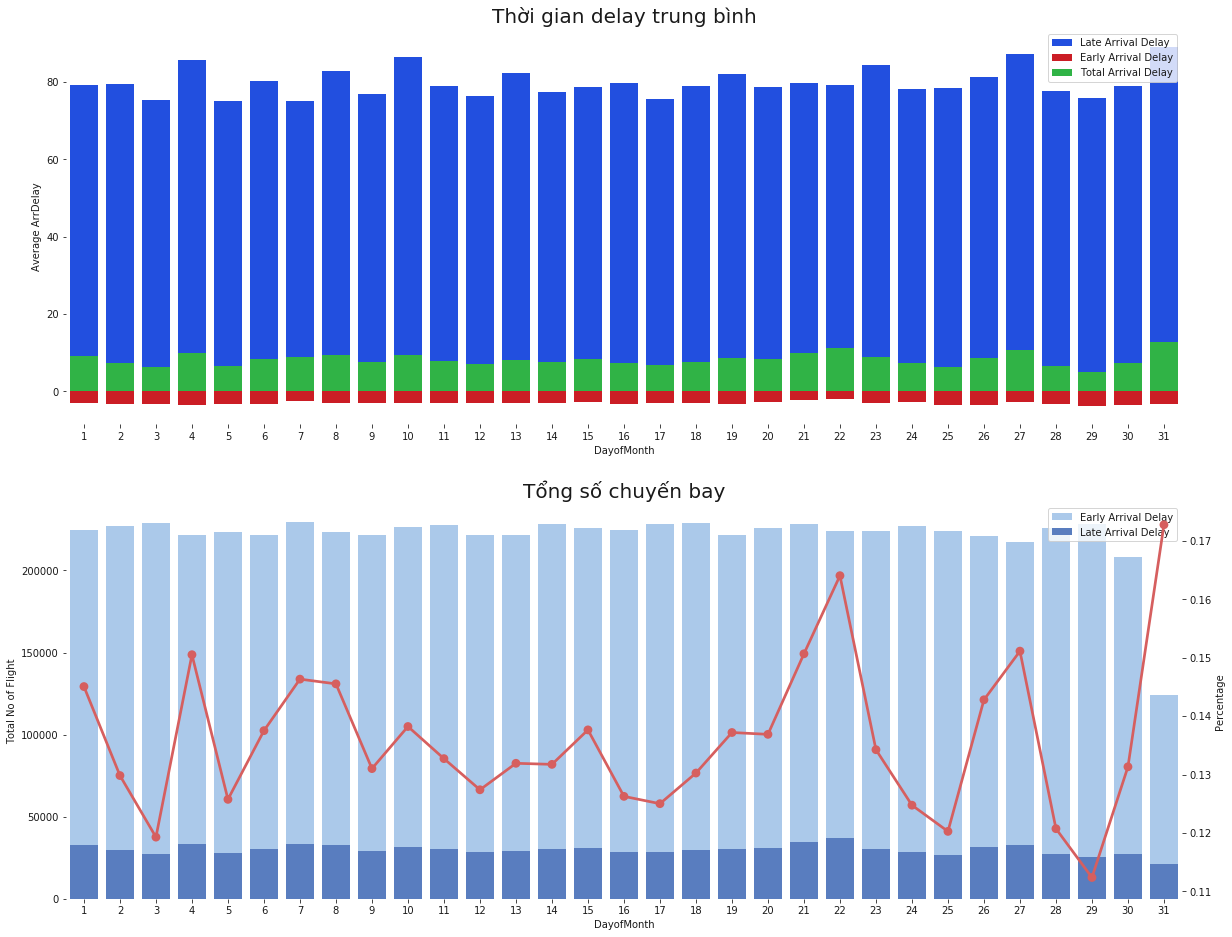

In [13]:
# Đồ thị thứ nhất
# data calculate
early_arrdelay_DoM = data[data.ArrDelay_idx == 0].groupby('DayofMonth').ArrDelay.mean()
early_arrdelay_DoM = pd.DataFrame({'DayofMonth':range(1,32),'ArrDelay':early_arrdelay_DoM.values})
late_arrdelay_DoM = data[data.ArrDelay_idx == 1].groupby('DayofMonth').ArrDelay.mean()
late_arrdelay_DoM = pd.DataFrame({'DayofMonth':range(1,32),'ArrDelay':late_arrdelay_DoM.values})
total_arrdelay_DoM = data.groupby('DayofMonth').ArrDelay.mean()
total_arrdelay_DoM = pd.DataFrame({'DayofMonth':range(1,32),'ArrDelay':total_arrdelay_DoM.values})
# set blank canvas
f, (ax, tabax) = plt.subplots(nrows=2,figsize=(20,16))
# draw
sns.set_color_codes("bright")
sns.barplot(y="ArrDelay", x="DayofMonth", data=late_arrdelay_DoM, label='Late Arrival Delay', color="b", orient='v', ax=ax)
sns.set_color_codes("bright")
sns.barplot(y='ArrDelay',x='DayofMonth',data=early_arrdelay_DoM,label='Early Arrival Delay',color='r', orient='v',ax=ax)
sns.set_color_codes("bright")
sns.barplot(y='ArrDelay',x='DayofMonth',data=total_arrdelay_DoM,label='Total Arrival Delay',color='g', orient='v',ax=ax)
# finalize
ax.legend(ncol=1, loc="upper right", frameon=True)
ax.set(ylabel='Average ArrDelay')
ax.set_title('Thời gian delay trung bình', fontdict={'fontsize': 20})
ax.grid(False)
ax._frameon = False
del early_arrdelay_DoM
del late_arrdelay_DoM
del total_arrdelay_DoM

# Đồ thị thứ hai
# data calculate
late_arrdelay_DoM_count = data[data.ArrDelay_idx == 1].groupby('DayofMonth').ArrDelay.count()
late_arrdelay_DoM_count = pd.DataFrame({'DayofMonth':range(1,32),'ArrDelay':late_arrdelay_DoM_count.values})
total_arrdelay_DoM_count = data.groupby('DayofMonth').ArrDelay.count()
total_arrdelay_DoM_count = pd.DataFrame({'DayofMonth':range(1,32),'ArrDelay':total_arrdelay_DoM_count.values})
late_arrdelay_DoM_average = pd.DataFrame({'DayofMonth':range(1,32), 'Percentage':late_arrdelay_DoM_count.ArrDelay/total_arrdelay_DoM_count.ArrDelay})
# draw
sns.set_color_codes("pastel")
sns.barplot(y='ArrDelay',x='DayofMonth',data=total_arrdelay_DoM_count,label='Early Arrival Delay',color='b', orient='v', ax=tabax)
sns.set_color_codes("muted")
sns.barplot(y='ArrDelay',x='DayofMonth',data=late_arrdelay_DoM_count,label='Late Arrival Delay',color='b', orient='v', ax=tabax)
# second axis on second canvas
tabax2 = tabax.twinx()
sns.pointplot(y = 'Percentage', x='DayofMonth', data=late_arrdelay_DoM_average, color='r', ax=tabax2, orient='v')
#finalize
tabax.legend(ncol=1, loc="upper right", frameon=True)
tabax.set(ylabel='Total No of Flight')
tabax.set_title('Tổng số chuyến bay', fontdict={'fontsize': 20})
sns.despine(ax=tabax,left=True, bottom=True)
tabax.grid(False)
tabax._frameon = False
tabax2._frameon = False
del late_arrdelay_DoM_count
del total_arrdelay_DoM_count
del late_arrdelay_DoM_average

- Các ngày cuối tháng có tần suất các chuyến 'Late' lớn hơn các ngày đầu tháng
- Thời gian delay TB không có nhiều sự khác biệt giữa các ngày trong tháng

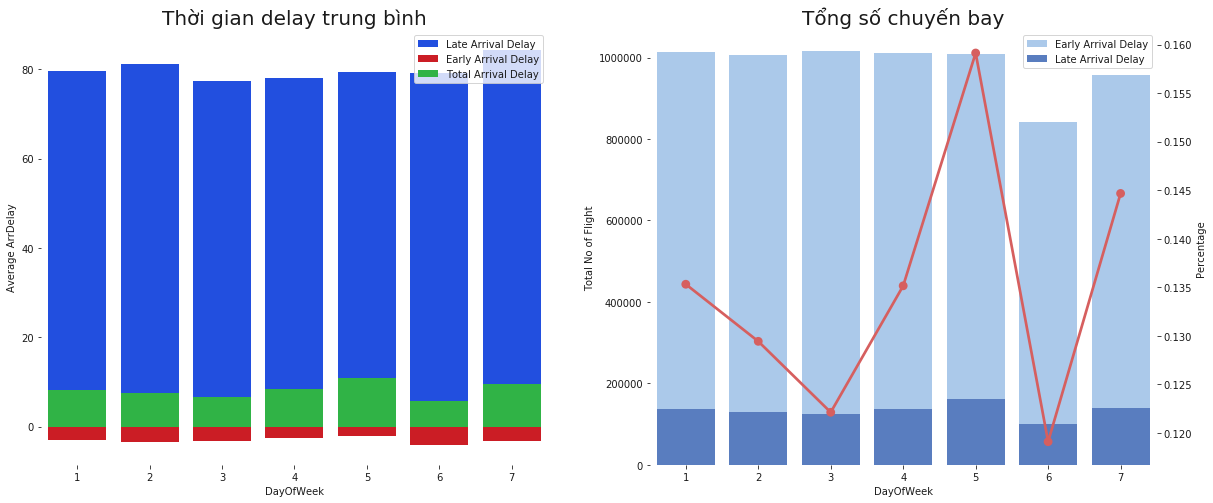

In [14]:
# Đồ thị thứ nhất
# data calculate
early_arrdelay_DoM = data[data.ArrDelay_idx == 0].groupby('DayOfWeek').ArrDelay.mean()
early_arrdelay_DoM = pd.DataFrame({'DayOfWeek':range(1,8),'ArrDelay':early_arrdelay_DoM.values})
late_arrdelay_DoM = data[data.ArrDelay_idx == 1].groupby('DayOfWeek').ArrDelay.mean()
late_arrdelay_DoM = pd.DataFrame({'DayOfWeek':range(1,8),'ArrDelay':late_arrdelay_DoM.values})
total_arrdelay_DoM = data.groupby('DayOfWeek').ArrDelay.mean()
total_arrdelay_DoM = pd.DataFrame({'DayOfWeek':range(1,8),'ArrDelay':total_arrdelay_DoM.values})
# set blank canvas
f, (ax, tabax) = plt.subplots(ncols=2,figsize=(20,8))
# draw
sns.set_color_codes("bright")
sns.barplot(y="ArrDelay", x="DayOfWeek", data=late_arrdelay_DoM, label='Late Arrival Delay', color="b", orient='v', ax=ax)
sns.set_color_codes("bright")
sns.barplot(y='ArrDelay',x='DayOfWeek',data=early_arrdelay_DoM,label='Early Arrival Delay',color='r', orient='v',ax=ax)
sns.set_color_codes("bright")
sns.barplot(y='ArrDelay',x='DayOfWeek',data=total_arrdelay_DoM,label='Total Arrival Delay',color='g', orient='v',ax=ax)
# finalize
ax.legend(ncol=1, loc="upper right", frameon=True)
ax.set(ylabel='Average ArrDelay')
ax.set_title('Thời gian delay trung bình', fontdict={'fontsize': 20})
ax.grid(False)
ax._frameon = False
del early_arrdelay_DoM
del late_arrdelay_DoM
del total_arrdelay_DoM

# Đồ thị thứ hai
# data calculate
late_arrdelay_DoM_count = data[data.ArrDelay_idx == 1].groupby('DayOfWeek').ArrDelay.count()
late_arrdelay_DoM_count = pd.DataFrame({'DayOfWeek':range(1,8),'ArrDelay':late_arrdelay_DoM_count.values})
total_arrdelay_DoM_count = data.groupby('DayOfWeek').ArrDelay.count()
total_arrdelay_DoM_count = pd.DataFrame({'DayOfWeek':range(1,8),'ArrDelay':total_arrdelay_DoM_count.values})
late_arrdelay_DoM_average = pd.DataFrame({'DayOfWeek':range(1,8), 'Percentage':late_arrdelay_DoM_count.ArrDelay/total_arrdelay_DoM_count.ArrDelay})
# draw
sns.set_color_codes("pastel")
sns.barplot(y='ArrDelay',x='DayOfWeek',data=total_arrdelay_DoM_count,label='Early Arrival Delay',color='b', orient='v', ax=tabax)
sns.set_color_codes("muted")
sns.barplot(y='ArrDelay',x='DayOfWeek',data=late_arrdelay_DoM_count,label='Late Arrival Delay',color='b', orient='v', ax=tabax)
# second axis on second canvas
tabax2 = tabax.twinx()
sns.pointplot(y = 'Percentage', x='DayOfWeek', data=late_arrdelay_DoM_average, color='r', ax=tabax2, orient='v')
#finalize
tabax.legend(ncol=1, loc="upper right", frameon=True)
tabax.set(ylabel='Total No of Flight')
tabax.set_title('Tổng số chuyến bay', fontdict={'fontsize': 20})
sns.despine(ax=tabax,left=True, bottom=True)
tabax.grid(False)
tabax._frameon = False
tabax2._frameon = False
del late_arrdelay_DoM_count
del total_arrdelay_DoM_count
del late_arrdelay_DoM_average

- Thứ 7 và Chủ nhật có ít chuyến bay hơn những ngày trong tuần
- Tần suất 'Late' cao nhất là vào thứ 6 và thấp nhất là thứ 7
- Thời gian delay giữa các ngày trong tuần không có chênh lệch đáng kể

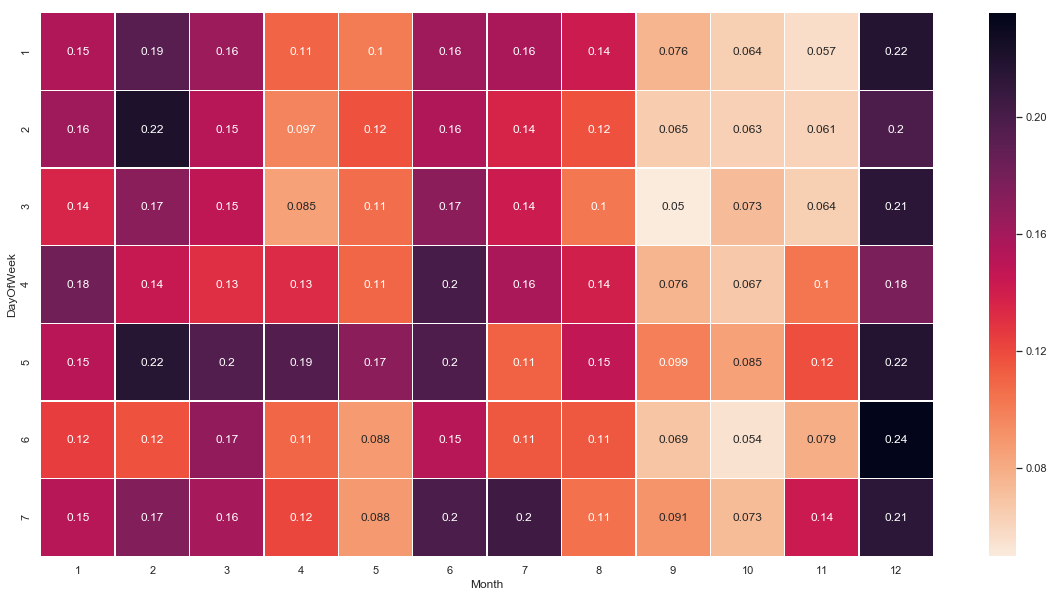

In [248]:
ArrDelay_by_Date = data.groupby(['DayOfWeek','Month']).ArrDelay_idx.mean()
ArrDelay_by_Date = pd.DataFrame({'DayOfWeek':ArrDelay_by_Date.index.labels[0],'Month':ArrDelay_by_Date.index.labels[1],'Percentage':ArrDelay_by_Date.values})
ArrDelay_by_Date['DayOfWeek'] = ArrDelay_by_Date['DayOfWeek']+1
ArrDelay_by_Date['Month'] = ArrDelay_by_Date['Month']+1
sns.set()
f, ax = plt.subplots(figsize=(20, 10))
ArrDelay_by_Date = ArrDelay_by_Date.pivot("DayOfWeek", "Month", "Percentage")
sns.heatmap(ArrDelay_by_Date, ax=ax,linewidths=.5,annot=True,cmap=sns.cm.rocket_r)
del ArrDelay_by_Date

Tần suất 'Late' tương tự như đã phân tích ở trên nhưng có sự khác nhau giữa các ngày trong cùng một tháng. Nhìn chung các ngày cuối tuần có khả năng trễ chuyến cao hơn, đặc biệt là khi rơi vào các tháng cao điểm.

C:\Users\PC\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


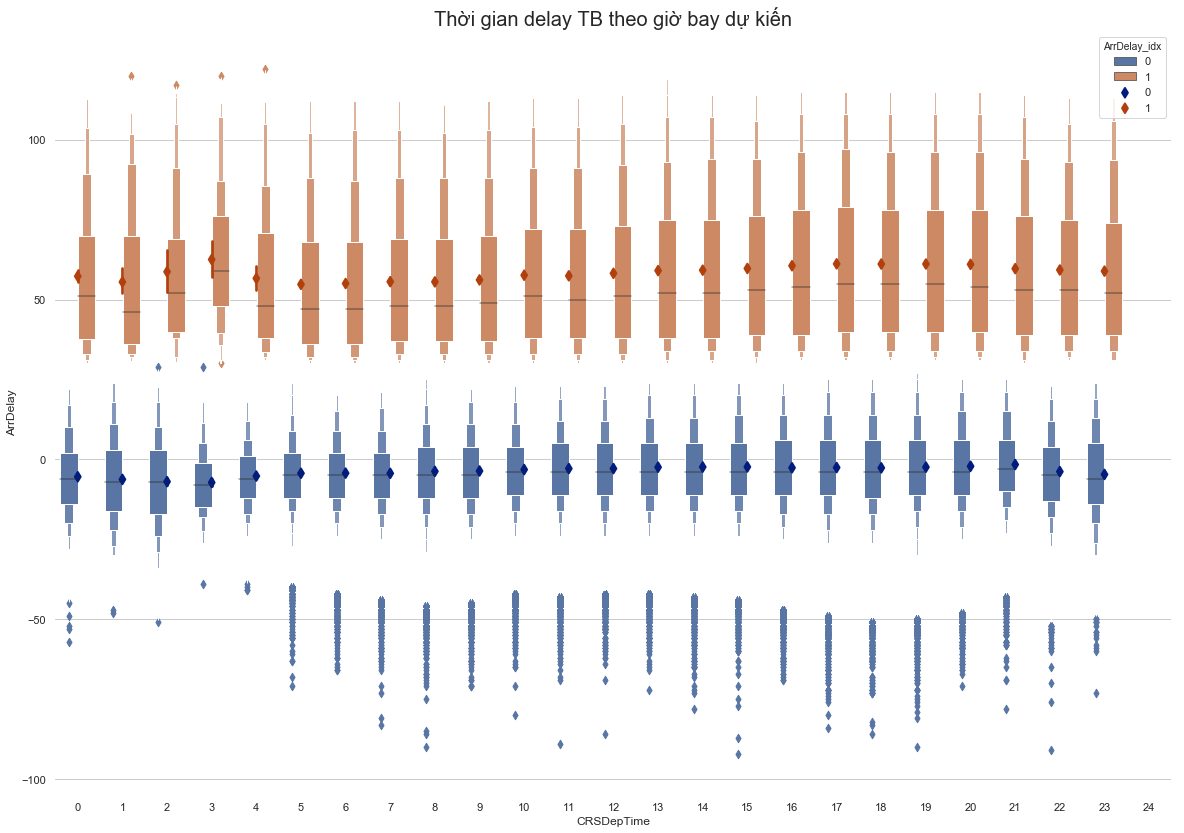

In [16]:
# remove outliers before start
data_outliers_removed = data[np.abs(sp.stats.zscore(data.ArrDelay))<3]
# put CRSDepTime into bins
CRSDepTime_bins = pd.timedelta_range(start = '0 days', periods=26, freq='H')
CRSDepTime_into_bins = pd.cut(data_outliers_removed.CRSDepTime, bins = CRSDepTime_bins, labels = range(25))
# construct new DF
ArrDelay_by_CRSDepTime = pd.DataFrame({'CRSDepTime':CRSDepTime_into_bins, 'ArrDelay':data.ArrDelay, 'ArrDelay_idx':data.ArrDelay_idx})
# stripplot
## set the canvas
sns.set(style = 'whitegrid')
f, ax = plt.subplots(figsize = (20,14))
## draw stripplot
sns.despine(bottom=True, left=True)
sns.boxenplot(y='ArrDelay',x='CRSDepTime',hue='ArrDelay_idx',data=ArrDelay_by_CRSDepTime, dodge=True)
## draw mean
sns.pointplot(y='ArrDelay',x='CRSDepTime',hue='ArrDelay_idx',data=ArrDelay_by_CRSDepTime,palette='dark',markers='d',join=False)
## improve legend
handles, labels = ax.get_legend_handles_labels()
ax.set_title('Thời gian delay TB theo giờ bay dự kiến', fontdict={'fontsize': 20})
## clear the trash
del CRSDepTime_bins
del CRSDepTime_into_bins
del ArrDelay_by_CRSDepTime
del data_outliers_removed

- Các chuyến bay có thời gian xuất phát dự kiến từ 3AM-4AM có thời gian delay TB cao nhất
- Các khoảng thời gian xuất phát còn lại trong ngày có thời gian delay TB xấp xỉ nhau.

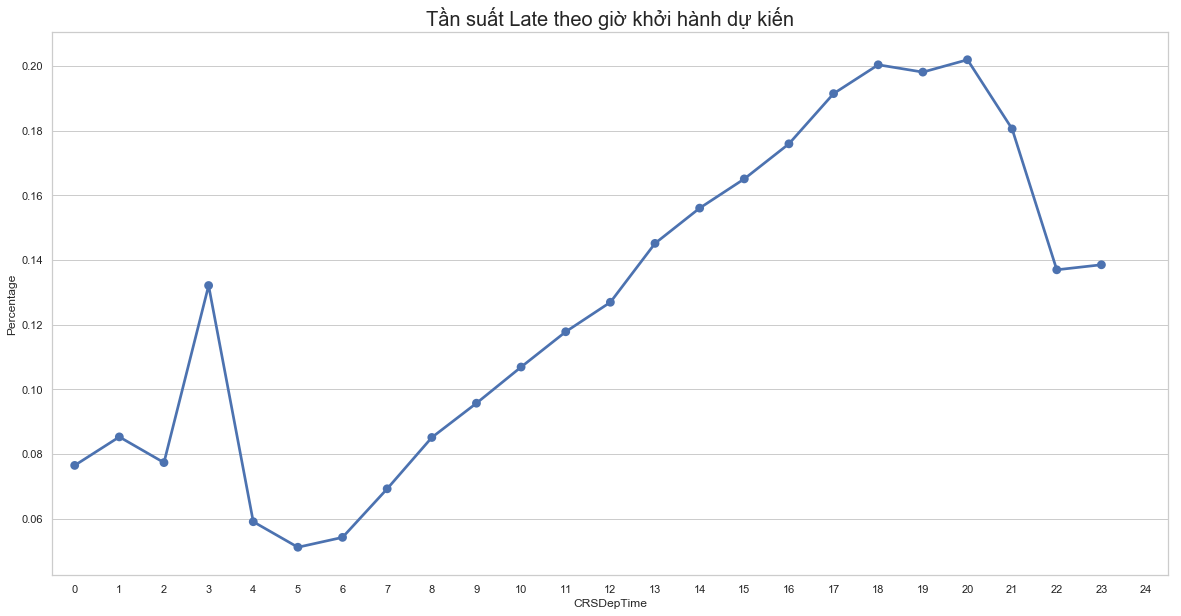

In [43]:
# put CRSDepTime into bins
CRSDepTime_bins = pd.timedelta_range(start = '0 days', periods=26, freq='H')
CRSDepTime_into_bins = pd.cut(data.CRSDepTime, bins = CRSDepTime_bins, labels = range(25))
# construct new DF
ArrDelay_by_CRSDepTime = pd.DataFrame({'CRSDepTime':CRSDepTime_into_bins, 'ArrDelay':data.ArrDelay, 'ArrDelay_idx':data.ArrDelay_idx})
ArrDelay_by_CRSDepTime = ArrDelay_by_CRSDepTime.groupby('CRSDepTime').agg({'ArrDelay_idx':['sum','count']})
ArrDelay_by_CRSDepTime['Percentage'] = ArrDelay_by_CRSDepTime.ArrDelay_idx['sum']/ArrDelay_by_CRSDepTime.ArrDelay_idx['count']
ArrDelay_by_CRSDepTime['CRSDepTime'] = range(25)
# plot
sns.set(style = 'whitegrid')
f,ax = plt.subplots(figsize=(20,10))
sns.pointplot(x='CRSDepTime', y='Percentage',data=ArrDelay_by_CRSDepTime)
ax.set_title('Tần suất Late theo giờ khởi hành dự kiến', fontdict={'fontsize': 20})
del CRSDepTime_bins
del CRSDepTime_into_bins
del ArrDelay_by_CRSDepTime

Tần suất trễ chuyến thể hiện một xu hướng tăng dần: các chuyến bay xuất phát sớm ít bị trễ chuyến hơn các chuyến xuất phát muộn. Các chuyến bay xuất phát lúc 18h-20h dễ bị trễ chuyến nhất.

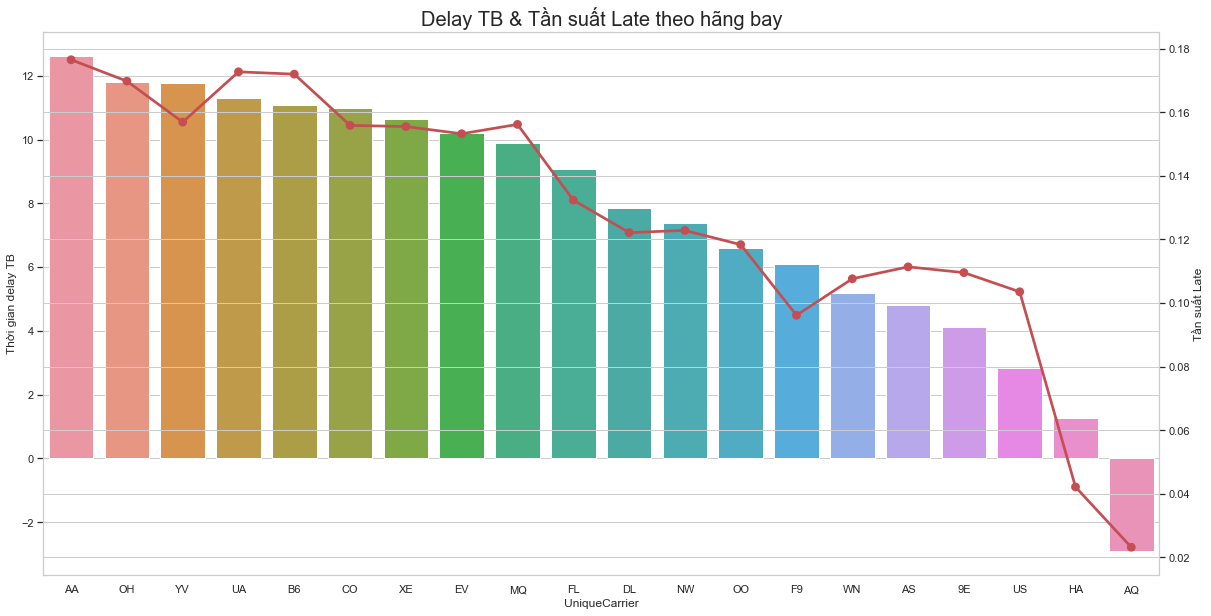

In [106]:
# prepare data
ArrDelay_by_Carrier = data.groupby('UniqueCarrier').agg({'ArrDelay_idx':['sum','count'], 'ArrDelay':'mean'})
ArrDelay_by_Carrier['Percentage'] = ArrDelay_by_Carrier.ArrDelay_idx['sum']/ArrDelay_by_Carrier.ArrDelay_idx['count']
ArrDelay_by_Carrier['UniqueCarrier']=ArrDelay_by_Carrier.index
ArrDelay_by_Carrier['ArrDelay_2']=ArrDelay_by_Carrier.ArrDelay['mean']
ArrDelay_by_Carrier=ArrDelay_by_Carrier.sort_values('ArrDelay_2', ascending=False)
# plot
sns.set(style='whitegrid')
f,ax=plt.subplots(figsize=(20,10))
sns.despine(left=True,bottom=True)
ax2 = ax.twinx()
sns.barplot(y='ArrDelay_2',x='UniqueCarrier',data=ArrDelay_by_Carrier,orient='v',ax=ax)
sns.pointplot(y='Percentage',x='UniqueCarrier',data=ArrDelay_by_Carrier,orient='v',ax=ax2,color='r')
ax.set(ylabel='Thời gian delay TB')
ax2.set(ylabel='Tần suất Late')
ax.set_title('Delay TB & Tần suất Late theo hãng bay', fontdict={'fontsize': 20})
del ArrDelay_by_Carrier

Các hãng có tần suất chuyến bay 'Late' và thời gian delay TB khác nhau. AA là hãng có nhiều chuyến bay 'Late' nhất (gần 18%) và thời gian delay TB cũng cao nhất (gần 12 phút). Trong khi đó, AQ là hãng bay có thời gian delay và tần suất delay thấp nhất.